# EDA

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("../Data/Clean_data/clean_data.csv")

In [3]:
df.head()

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


Observamos todas las clasificaciones de ticket que tenemos

In [4]:
df["ticket_classification"].unique()

array(['Debt collection + Credit card debt',
       'Credit card or prepaid card + General-purpose credit card or charge card',
       'Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report',
       'Credit reporting, credit repair services, or other personal consumer reports + Credit reporting',
       'Checking or savings account + Checking account',
       'Vehicle loan or lease + Loan',
       'Money transfer, virtual currency, or money service + Domestic (US) money transfer',
       'Checking or savings account + Savings account',
       'Mortgage + Conventional home mortgage',
       'Mortgage + Home equity loan or line of credit (HELOC)',
       'Student loan + Private student loan',
       'Debt collection + I do not know', 'Consumer Loan + Vehicle loan',
       'Mortgage + FHA mortgage',
       'Money transfer, virtual currency, or money service + Mobile or digital wallet',
       'Money transfer, virtual currency, or mon

Contamos cuantas clasificaciones de ticket tenemos

In [5]:
df["ticket_classification"].nunique()

78

Observamos cuantas observaciones hay por cada clasificación

In [6]:
df['ticket_classification'].value_counts()

ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
                                                                                                   ... 
Checking or savings account + Personal line of credit                                                 1
Prepaid card + Other special purpose card                                                             1
Debt collection + Federal student loan                                                                1
Other financial service + Money order     

Cambiamos el orden para ver si hay categorias que no tiene valor

In [12]:
df['ticket_classification'].value_counts(ascending=True)

ticket_classification
Debt collection + Payday loan                                                                         1
Prepaid card + Electronic Benefit Transfer / EBT card                                                 1
Checking or savings account + Personal line of credit                                                 1
Prepaid card + Other special purpose card                                                             1
Other financial service + Money order                                                                 1
                                                                                                   ... 
Mortgage + Conventional home mortgage                                                               955
Bank account or service + Checking account                                                         1242
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Checking or savings account + Checking acc

Podemos ver como hay categorias que no tienen mucho valor porque solamente tienen una categoria. Esto nos puede ayudar a eliminar categorias que no tengan muchos datos, ya que solo perjudicara al modelo.

C:\Users\ctorr\AppData\Local\Temp\ipykernel_6800\898490885.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


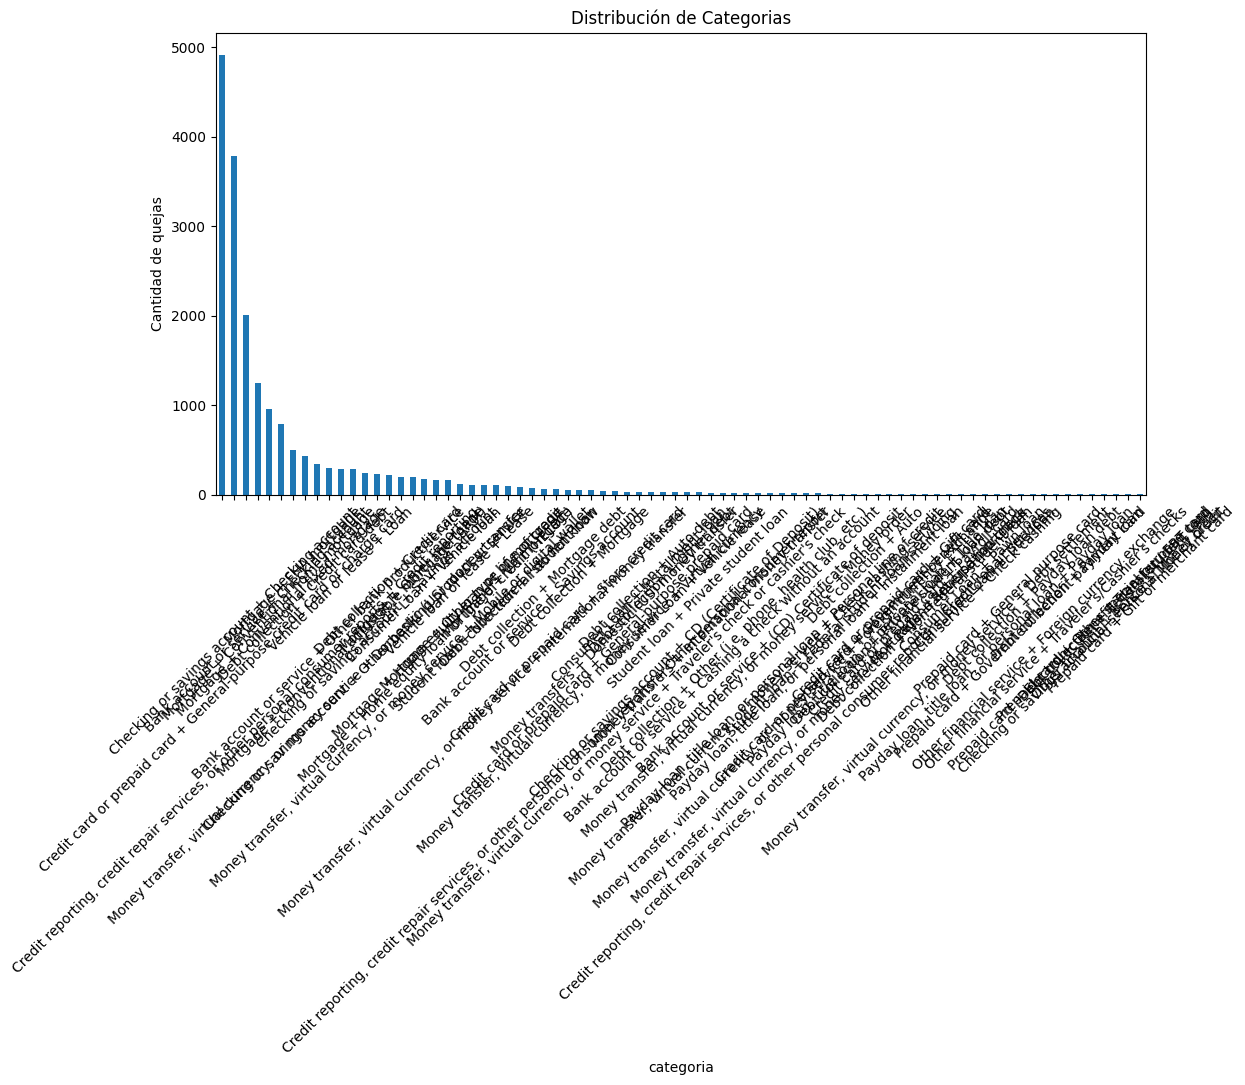

In [15]:
plt.figure(figsize=(12, 6))
df['ticket_classification'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorias')
plt.xlabel('categoria')
plt.ylabel('Cantidad de quejas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver como las categorias, a partir de que pasan las 50 quejas se pueden ver reflejadas en el gráfico entonces podría ser un buen threshold

Generamos una nube de palabras de las palabras mas importantes de lo que se dice en los diferentes reportes

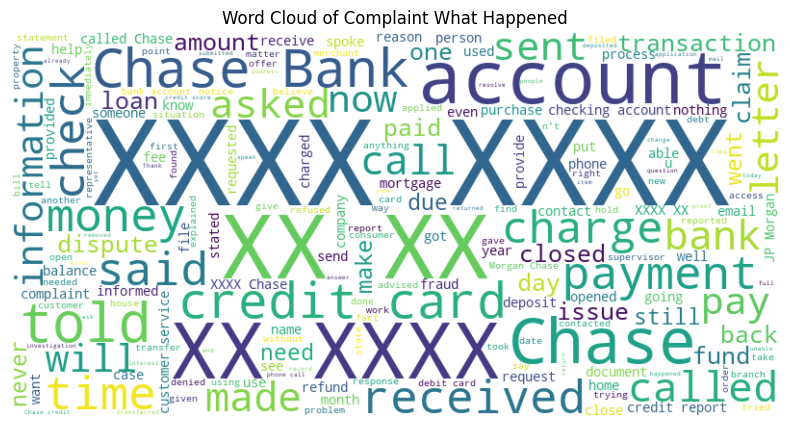

In [8]:
# Combinar todo el texto de la columna 'complaint_what_happened' en una sola cadena
text = " ".join(df['complaint_what_happened'].dropna().astype(str).tolist())

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Complaint What Happened')
plt.show()

Con esta imagen nos podemos dar cuenta de que generalmente se pasan muchos datos confidenciales, habla mucho de transacciones recibidas, enviadas, pagos, lo que da a entender que  muchos clientes están experimentando dificultades con sus cuentas bancarias y tarjetas de crédito, incluyendo problemas de verificación de deudas y servicios de atención al cliente. Tambien hablan sobre estados(statement), información, aplicación, o que habían llamado anteriormemte y ya les habian dicho cosas anteriormente, lo que también nos dice que  hay quejas sobre la gestión de aplicaciones y la comunicación de información por parte del banco. Básicamente con esto nos podemos dar cuenta que el banco Chase no esta llevando buena gestión de cuentas y tarjetas de crédito, así como por la calidad del servicio al cliente.

### 10 palabras con más frecuencia por cada clasificación

In [14]:
# Iteramos sobre cada categoría única en 'ticket_classification'
for category in df['ticket_classification'].unique():
    # Filtramos el DataFrame para la categoría actual
    category_text = df[df['ticket_classification'] == category]['complaint_what_happened']
    
    # Inicializamos el CountVectorizer con stop words en inglés y un máximo de 10 características
    vectorizer = CountVectorizer(stop_words='english', max_features=10)
    
    # Ajustmosr y transformamos los datos de texto para la categoría actual
    X = vectorizer.fit_transform(category_text)
    
    # Convertimos los conteos de palabras a un DataFrame
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Imprimimos las 10 palabras más comunes por categoría
    print(f"Top 10 palabras para {category}:")
    print(word_counts.sum().sort_values(ascending=False).head(10))

Top 10 palabras para Debt collection + Credit card debt:
xxxx       4549
chase      1256
xx         1224
credit     1067
account     698
debt        649
card        534
00          426
report      393
bank        372
dtype: int64
Top 10 palabras para Credit card or prepaid card + General-purpose credit card or charge card:
xxxx        51798
xx          22929
chase       20942
card        13634
credit      13071
account      7988
00           7835
did          4111
received     3956
told         3924
dtype: int64
Top 10 palabras para Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report:
xxxx           546
xx             174
chase          173
credit         128
account         74
bank            71
card            46
called          42
information     39
said            36
dtype: int64
Top 10 palabras para Credit reporting, credit repair services, or other personal consumer reports + Credit reporting:
xxxx         17391
xx        

Podemos ver como predomina "xxxx" y "xx", lo cual es información confidencial, pero eso nos va a ayudar a eliminarlo en el preprocessing porque solo le va a meter ruido al modelo.

El EDA me ha ayudado a comprender mejor el dataset, pude indentificar patrones y tendencias clave en las quejas de los clientes. A través del EDA, he identificado las palabras y frases más frecuentes, así como las categorías de quejas más comunes, lo que proporciona una visión más clara de los problemas recurrentes. Además me ha ayudado a identificar ciertos aspectos para el preprocesamiento, que sin duda alguna van a ayudar en el modelado de datos